In [ ]:
## reading the dataset
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import kagglehub
import numpy

In [ ]:
# Download latest version
path = kagglehub.dataset_download("alitaqi000/world-university-rankings-2023")

print("Path to dataset files:", path)

100%|██████████| 70.2k/70.2k [00:00<00:00, 421kB/s]

Extracting files...
Path to dataset files: /home/momiji/.cache/kagglehub/datasets/alitaqi000/world-university-rankings-2023/versions/1


### Universities' Rankings around the world

- Total of 2341 university and its international global ranking for year 2023

In [8]:
# copied the csv file by hand from path to the current working directory
path = './World University Rankings 2023.csv'

# read and explore dataset 
data1 = pd.read_csv(path)


print("Dataset Information: ")
## getteing a quick view

print(data1.info())

print()
print("Dataset Description: ")
## describing all data

print(data1.describe(include='all'))

print()
print("Dataset Shape: ")
# data's dimension - shape
print(data1.shape)

Dataset Information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2341 entries, 0 to 2340
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   University Rank              2341 non-null   object 
 1   Name of University           2233 non-null   object 
 2   Location                     2047 non-null   object 
 3   No of student                2209 non-null   object 
 4   No of student per staff      2208 non-null   float64
 5   International Student        2209 non-null   object 
 6   Female:Male Ratio            2128 non-null   object 
 7   OverAll Score                1799 non-null   object 
 8   Teaching Score               1799 non-null   float64
 9   Research Score               1799 non-null   float64
 10  Citations Score              1799 non-null   float64
 11  Industry Income Score        1799 non-null   float64
 12  International Outlook Score  1799 non-null   float64
d

In [ ]:
# what is University Rank?
data1['University Rank'].head(20)

data1.iloc[0]
# its a number indicating top uni, second top, and so on...
# but it is in a srting form -object-

University Rank                                   1
Name of University             University of Oxford
Location                             United Kingdom
No of student                                20,965
No of student per staff                        10.6
International Student                           42%
Female:Male Ratio                           48 : 52
OverAll Score                                  96.4
Teaching Score                                 92.3
Research Score                                 99.7
Citations Score                                99.0
Industry Income Score                          74.9
International Outlook Score                    96.2
Name: 0, dtype: object

In [ ]:
# check for missing values
print('Dataset missing values:')
print(data1.isna().sum())

# copy dataset
data_copy = data1.copy()

# uni rank
data_copy['University Rank'] = pd.to_numeric(data1['University Rank'], errors='coerce')

# check if numbers were not converted succesfuly 
print('uni rank: number of null entries after converting with pandas: ', data_copy['University Rank'].isna().sum())

print()

Dataset missing values:
University Rank                  0
Name of University             108
Location                       294
No of student                  132
No of student per staff        133
International Student          132
Female:Male Ratio              213
OverAll Score                  542
Teaching Score                 542
Research Score                 542
Citations Score                542
Industry Income Score          542
International Outlook Score    542
dtype: int64
number of null entries after converting with pandas:  2142



In [ ]:
# copy dataset incase of error!
data_copy = data1.copy()

# handle No of Students -> processing them into a numerical column 
def replace_coma(str_num: str) ->int :
    try:
        if "," in str_num: 
            return int(str_num.replace(",", ""))
        elif len(str_num) <= 3:
            return int(str_num)
        elif type(str_num) is int:
            print('it is an integer')
        else:
            print(f"The String Number is different than the others {str_num}, type: {type(str_num)} Needs different preprocessing!")
            raise ValueError
    except Exception as e:
        print(e)
        print(str_num)

print('Apply the preprocessing - categorical conversion to numerical')
data_copy["NoStudents_numerical"] = data_copy['No of student'].apply(replace_coma)

data_copy['NoStudents_numerical']

Drop missing values of No of Students column
132
Apply the preprocessing - categorical conversion to numerical
argument of type 'float' is not iterable
nan
argument of type 'float' is not iterable
nan
argument of type 'float' is not iterable
nan
argument of type 'float' is not iterable
nan
argument of type 'float' is not iterable
nan
argument of type 'float' is not iterable
nan
argument of type 'float' is not iterable
nan
argument of type 'float' is not iterable
nan
argument of type 'float' is not iterable
nan
argument of type 'float' is not iterable
nan
argument of type 'float' is not iterable
nan
argument of type 'float' is not iterable
nan
argument of type 'float' is not iterable
nan
argument of type 'float' is not iterable
nan
argument of type 'float' is not iterable
nan
argument of type 'float' is not iterable
nan
argument of type 'float' is not iterable
nan
argument of type 'float' is not iterable
nan
argument of type 'float' is not iterable
nan
argument of type 'float' is not it

0       20965.0
1       21887.0
2       20185.0
3       16164.0
4       11415.0
         ...   
2336        NaN
2337        NaN
2338        NaN
2339        NaN
2340        NaN
Name: NoStudents_numerical, Length: 2341, dtype: float64

In [ ]:
## splitting data into categorical and numerical
## categorical
data1.select_dtypes(include = ['object']).columns

Index(['University Rank', 'Name of University', 'Location', 'No of student',
       'International Student', 'Female:Male Ratio', 'OverAll Score'],
      dtype='object')

In [ ]:
## numerical
data1.select_dtypes(include = ['integer','float']).columns

Index(['No of student per staff', 'Teaching Score', 'Research Score',
       'Citations Score', 'Industry Income Score',
       'International Outlook Score'],
      dtype='object')

<Axes: ylabel='Female:Male Ratio'>

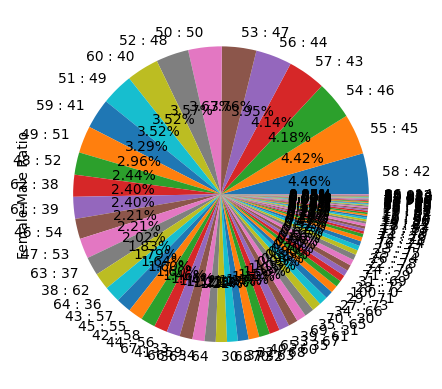

In [ ]:
data1['Female:Male Ratio'].value_counts().plot(kind='pie',autopct='%1.2f%%')

<Axes: ylabel='Location'>

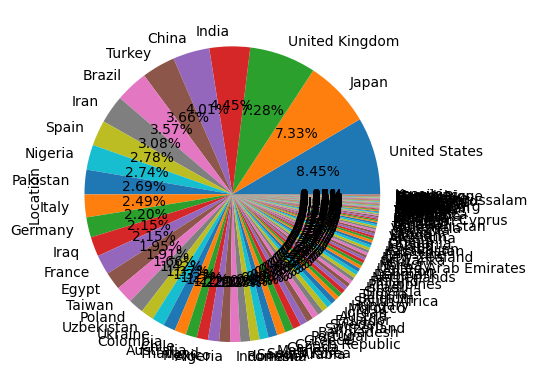

In [ ]:
data1['Location'].value_counts().plot(kind='pie',autopct='%1.2f%%')

<Axes: xlabel='Industry Income Score', ylabel='Count'>

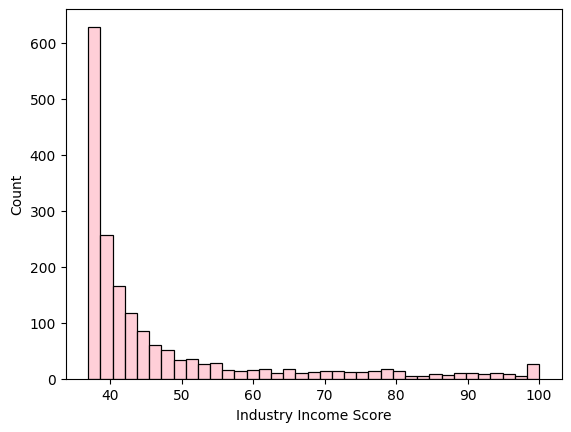

In [ ]:
sns.histplot(data1['Industry Income Score'], color = 'pink')

<Axes: xlabel='International Outlook Score', ylabel='Count'>

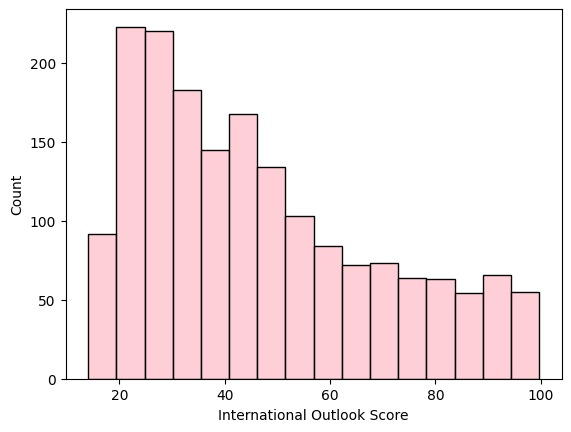

In [ ]:
sns.histplot(data1['International Outlook Score'], color = 'pink')

<Axes: xlabel='Teaching Score', ylabel='Count'>

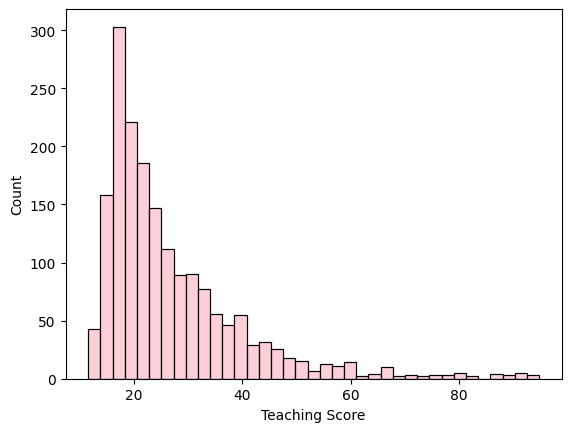

In [ ]:
sns.histplot(data1['Teaching Score'], color = 'pink')

<Axes: xlabel='Female:Male Ratio'>

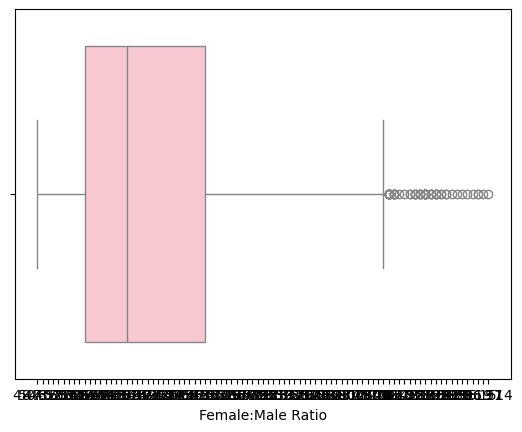

In [ ]:
sns.boxplot(x = data1['Female:Male Ratio'],color = 'pink', data = data1)

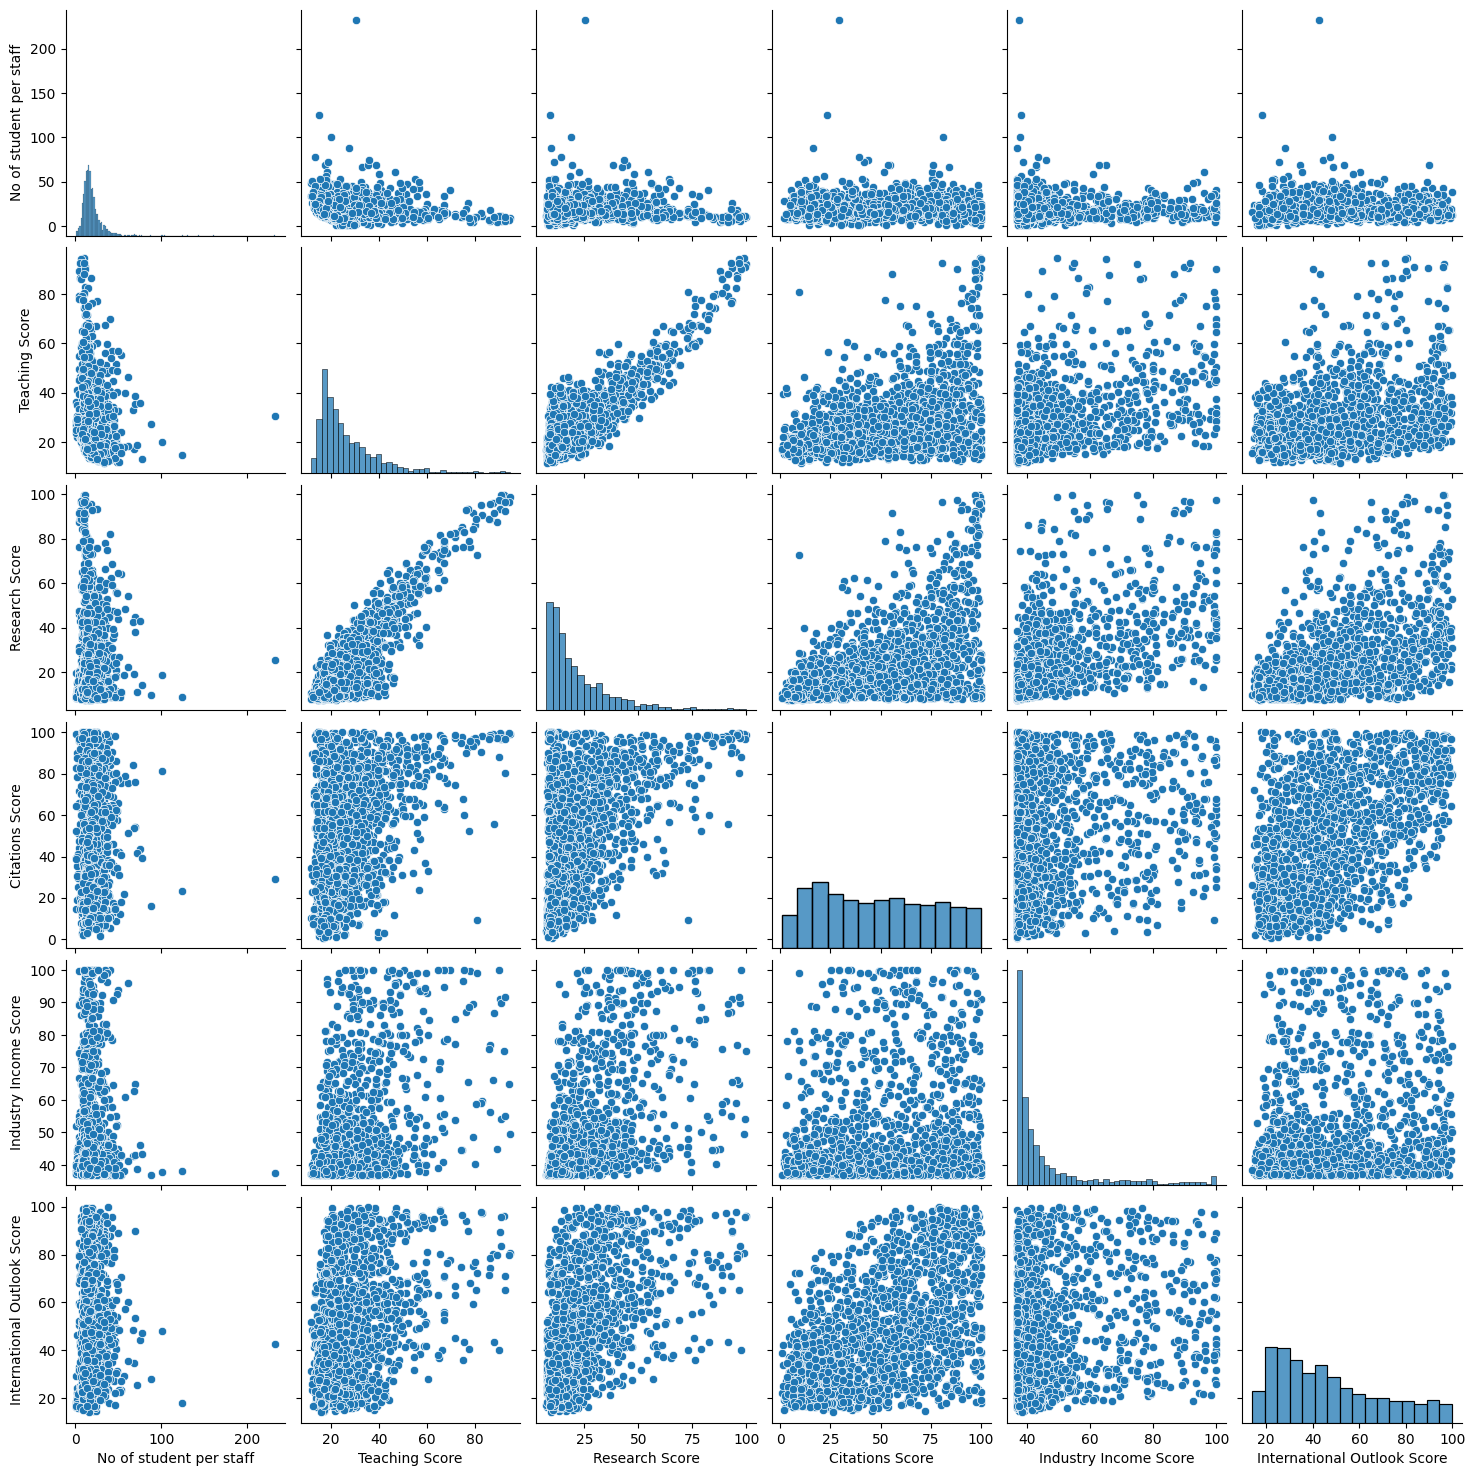

In [ ]:
sns.pairplot(data1)

<ipython-input-19-52b168fafa99>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data1.corr()


<Axes: >

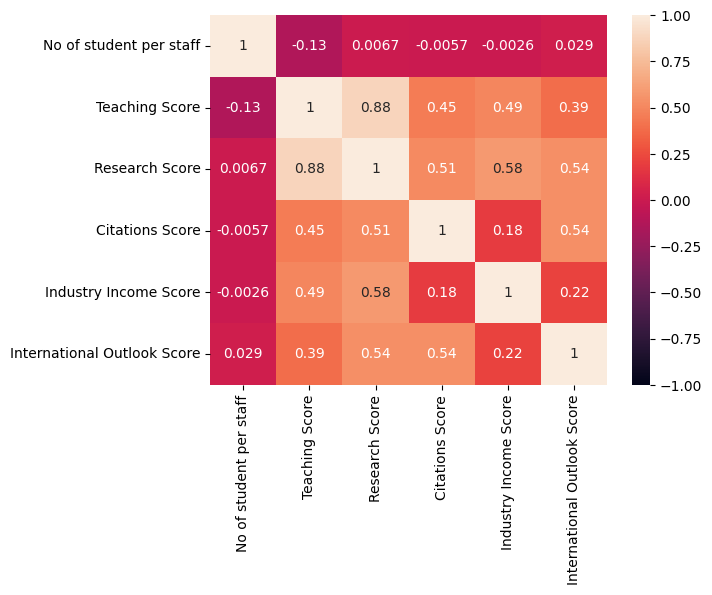

In [ ]:
corr = data1.corr()

sns.heatmap(corr, vmin = -1, vmax = 1, annot = True)

2. The second dataset is about weather daily changes and its effects on COVID-10 spreading result around the world

In [ ]:
data2 = pd.read_csv('/content/training_data_with_weather_info_week_1.csv')

In [ ]:
## getteing a quick view

data2.info()

## Lat = The nation considered
## Long = Latitude (how far is it north or south the equador)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17892 entries, 0 to 17891
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  17892 non-null  int64  
 1   Province/State      8190 non-null   object 
 2   Country/Region      17892 non-null  object 
 3   Lat                 17892 non-null  float64
 4   Long                17892 non-null  float64
 5   Date                17892 non-null  object 
 6   ConfirmedCases      17892 non-null  int64  
 7   Fatalities          17892 non-null  int64  
 8   day_from_jan_first  17892 non-null  int64  
 9   temp                17892 non-null  float64
dtypes: float64(3), int64(4), object(3)
memory usage: 1.4+ MB


In [ ]:
## describing all data

data2.describe(include='all')

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities,day_from_jan_first,temp
count,17892.000000,8190,17892,17892.000000,17892.000000,17892,17892.000000,17892.000000,17892.00000,17892.000000
unique,NaN,128,163,NaN,NaN,63,NaN,NaN,NaN,NaN
top,NaN,Diamond Princess,US,NaN,NaN,1/22/2020,NaN,NaN,NaN,NaN
freq,NaN,126,3654,NaN,NaN,284,NaN,NaN,NaN,NaN
mean,13191.500000,NaN,NaN,26.287693,4.766191,NaN,325.207523,11.974737,53.00000,54.849313
std,7624.675152,NaN,NaN,22.935092,79.923261,NaN,3538.599684,174.346267,18.18475,22.306125
min,1.000000,NaN,NaN,-41.454500,-157.498300,NaN,0.000000,0.000000,22.00000,-27.200000
25%,6596.250000,NaN,NaN,13.145425,-71.516375,NaN,0.000000,0.000000,37.00000,38.800000
50%,13191.500000,NaN,NaN,32.985550,9.775000,NaN,0.000000,0.000000,53.00000,53.900000
75%,19786.750000,NaN,NaN,42.501575,64.688975,NaN,10.000000,0.000000,69.00000,76.800000


In [ ]:
data2.shape

(17892, 10)

In [ ]:
## splitting data into categorical and numerical
## categorical
data2.select_dtypes(include = ['object']).columns

Index(['Province/State', 'Country/Region', 'Date'], dtype='object')

In [ ]:
## numerical
num = data2.select_dtypes(include = ['integer','float']).columns
num

Index(['Id', 'Lat', 'Long', 'ConfirmedCases', 'Fatalities',
       'day_from_jan_first', 'temp'],
      dtype='object')

In [ ]:
data2.isnull().sum()

Id                       0
Province/State        9702
Country/Region           0
Lat                      0
Long                     0
Date                     0
ConfirmedCases           0
Fatalities               0
day_from_jan_first       0
temp                     0
dtype: int64

In [ ]:
data2.nunique()

Id                    17892
Province/State          128
Country/Region          163
Lat                     272
Long                    276
Date                     63
ConfirmedCases         1023
Fatalities              204
day_from_jan_first       63
temp                   1069
dtype: int64

<Axes: ylabel='Country/Region'>

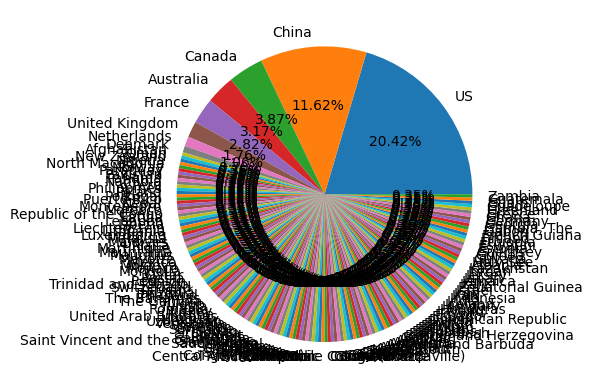

In [ ]:
data2['Country/Region'].value_counts().plot(kind='pie',autopct='%1.2f%%')

<Axes: xlabel='Fatalities', ylabel='Count'>

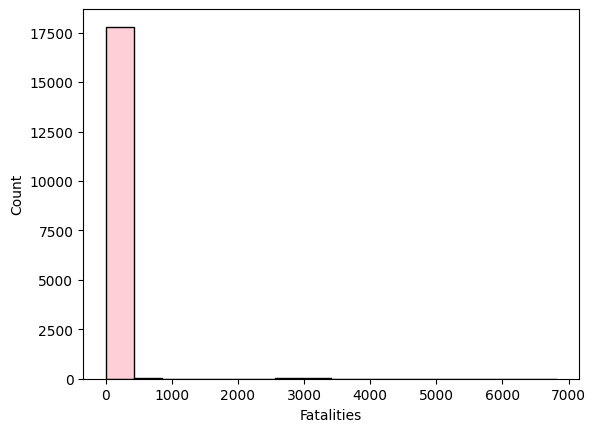

In [ ]:
sns.histplot(x=data2['Fatalities'], color = 'pink')

<Axes: xlabel='Lat'>

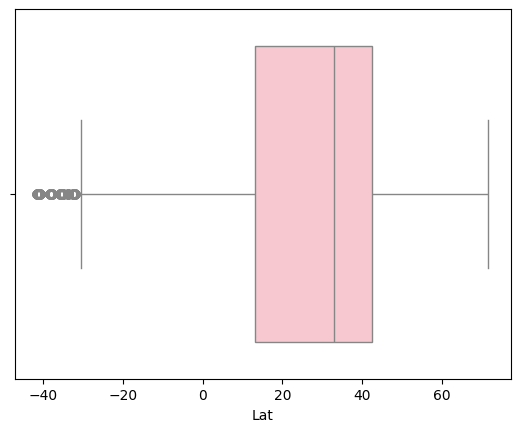

In [ ]:
sns.boxplot(x = data2['Lat'],color = 'pink', data = data2)

<Axes: xlabel='ConfirmedCases'>

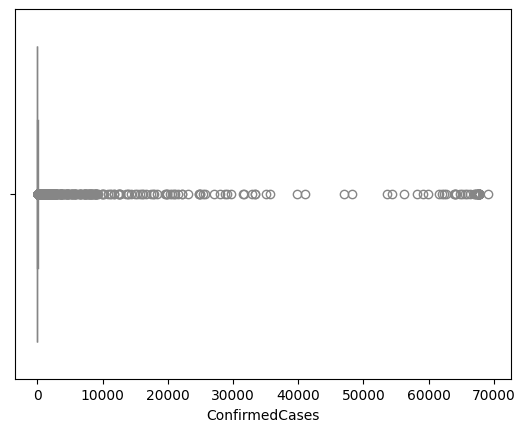

In [ ]:
sns.boxplot(x = data2['ConfirmedCases'],color = 'pink', data = data2)

Id
Skew : -0.0


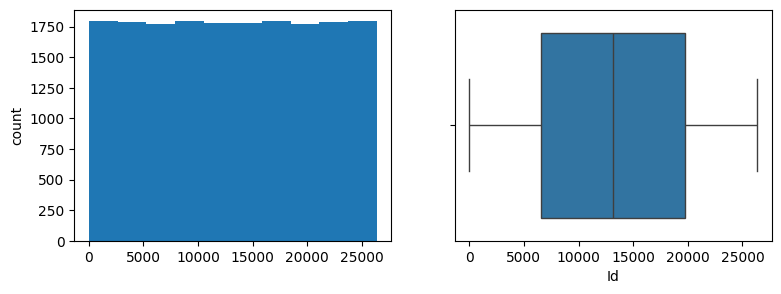

Lat
Skew : -0.96


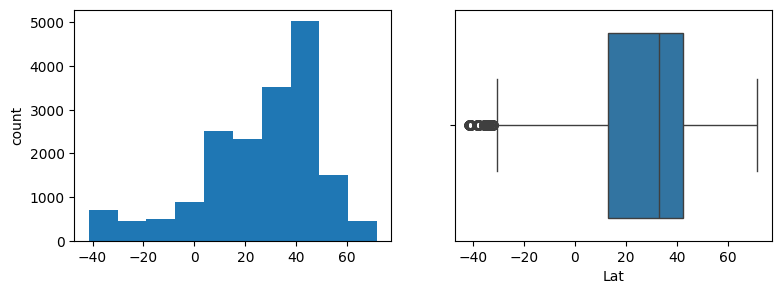

Long
Skew : 0.14


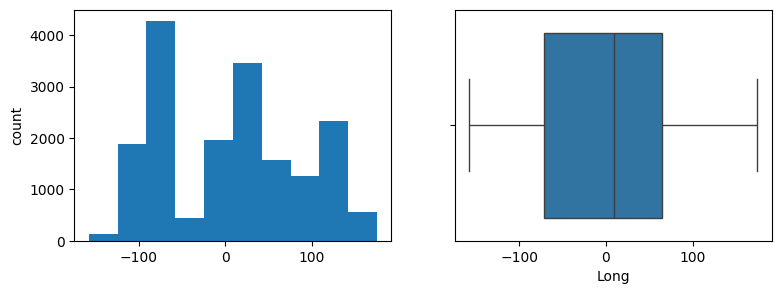

ConfirmedCases
Skew : 16.55


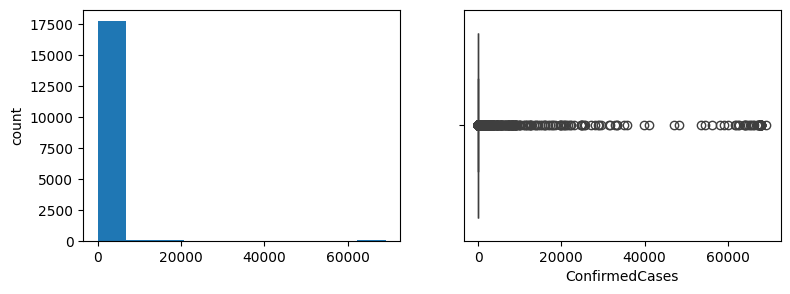

Fatalities
Skew : 20.12


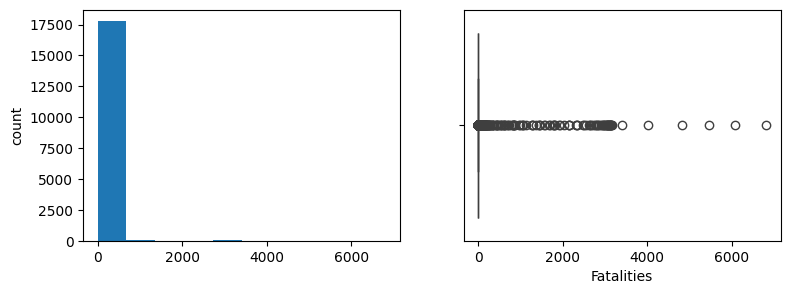

day_from_jan_first
Skew : 0.0


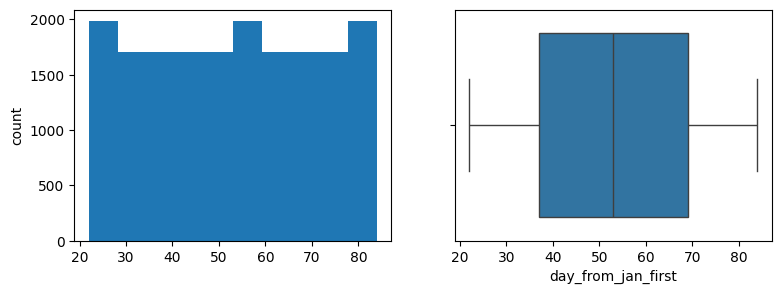

temp
Skew : -0.38


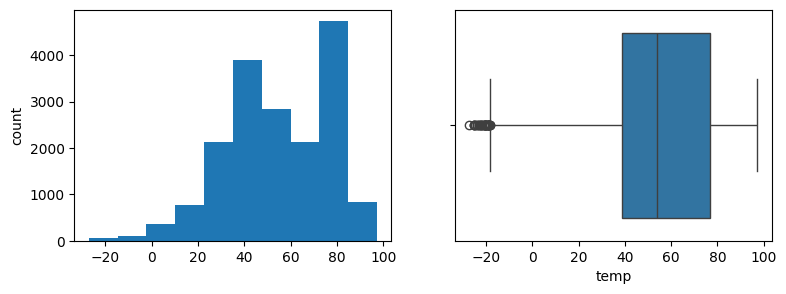

In [ ]:
for col in num:
  print(col)
  print('Skew :', round(data2[col].skew(), 2))
  plt.figure(figsize = (9, 3))
  plt.subplot(1, 2, 1)
  data2[col].hist(grid=False)
  plt.ylabel('count')
  plt.subplot(1, 2, 2)
  sns.boxplot(x=data2[col])
  plt.show()

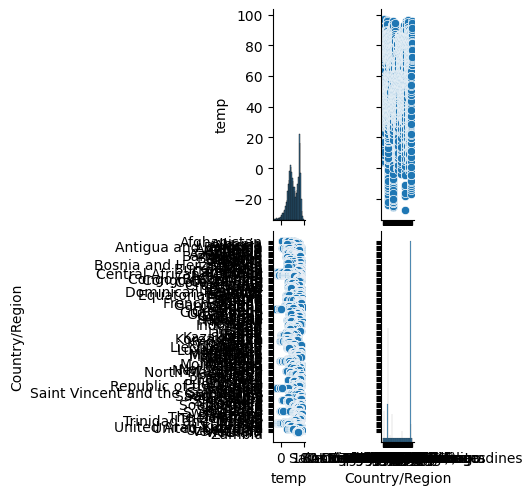

In [ ]:
sns.pairplot(data2, vars = ['temp','Country/Region'])

<ipython-input-35-93c046e7eef8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data2.corr()


<Axes: >

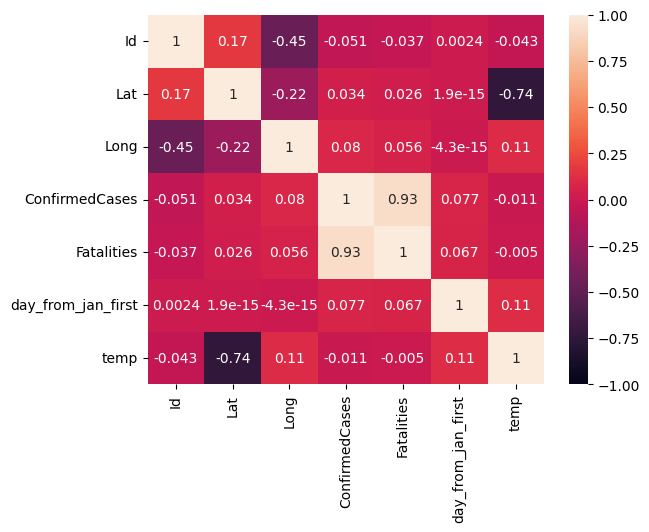

In [ ]:
corr = data2.corr()

sns.heatmap(corr, vmin = -1, vmax = 1, annot = True)

3. the third dataset is about fuel usage quanitities of different cars, engine models

In [ ]:
data3 = pd.read_csv('/content/fuel.csv')

<ipython-input-49-feb9c2ce75e6>:1: DtypeWarning: Columns (7,44) have mixed types. Specify dtype option on import or set low_memory=False.
  data3 = pd.read_csv('/content/fuel.csv')


In [ ]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32499 entries, 0 to 32498
Data columns (total 81 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   vehicle_id                         32499 non-null  int64  
 1   year                               32499 non-null  int64  
 2   make                               32499 non-null  object 
 3   model                              32499 non-null  object 
 4   class                              32499 non-null  object 
 5   drive                              31310 non-null  object 
 6   transmission                       32488 non-null  object 
 7   transmission_type                  15045 non-null  object 
 8   engine_index                       32499 non-null  int64  
 9   engine_descriptor                  19128 non-null  object 
 10  engine_cylinders                   32456 non-null  float64
 11  engine_displacement                32457 non-null  flo

In [ ]:
data3.shape

(32499, 81)

In [ ]:
data3.isnull().sum()

vehicle_id               0
year                     0
make                     0
model                    0
class                    0
                     ...  
city_range_ft1           1
highway_range_ft1        1
range_ft2            32499
city_range_ft2           1
highway_range_ft2        1
Length: 81, dtype: int64

In [ ]:
data3.drop(['range_ft2'], axis =1)

,vehicle_id,year,make,model,class,drive,transmission,transmission_type,engine_index,engine_descriptor,...,hours_to_charge_240v,hours_to_charge_ac_240v,composite_city_mpg,composite_highway_mpg,composite_combined_mpg,range_ft1,city_range_ft1,highway_range_ft1,city_range_ft2,highway_range_ft2
0,26587,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,NaN,Manual 5-Speed,NaN,9001,(FFS),...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,27705,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,NaN,Manual 5-Speed,NaN,9005,(FFS) CA model,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,26561,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,NaN,Manual 5-Speed,NaN,9002,(FFS),...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,27681,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,NaN,Manual 5-Speed,NaN,9006,(FFS) CA model,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,27550,1984,AM General,DJ Po Vehicle 2WD,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,NaN,1830,(FFS),...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32494,33173,2013,Honda,Accord,Midsize Cars,Front-Wheel Drive,Automatic (S6),NaN,32,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32495,33269,2013,Honda,Accord,Midsize Cars,Front-Wheel Drive,Automatic (variable gear ratios),NaN,21,SIDI,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32496,33172,2013,Honda,Accord,Midsize Cars,Front-Wheel Drive,Automatic 6-Speed,NaN,31,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32497,33171,2013,Honda,Accord,Midsize Cars,Front-Wheel Drive,Manual 6-Speed,NaN,22,SIDI,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data3.nunique()

vehicle_id           32499
year                    30
make                   129
model                 3021
class                   34
                     ...  
city_range_ft1          11
highway_range_ft1       12
range_ft2                0
city_range_ft2           6
highway_range_ft2        6
Length: 81, dtype: int64

In [ ]:
## splitting data to categorical and numerical

cat= data3.select_dtypes(include = ['object']).columns
cat
print('cat = ', cat)
num= data3.select_dtypes(include = ['integer','float']).columns
print('\nnum = ', num)

cat =  Index(['make', 'model', 'class', 'drive', 'transmission', 'transmission_type',
       'engine_descriptor', 'turbocharger', 'fuel_type', 'fuel_type_1',
       'gas_guzzler_tax', 'my_mpg_data', 'alternative_fuel_technology'],
      dtype='object')

num =  Index(['vehicle_id', 'year', 'engine_index', 'engine_cylinders',
       'engine_displacement', 'supercharger', 'fuel_type_2', 'city_mpg_ft1',
       'unrounded_city_mpg_ft1', 'city_mpg_ft2', 'unrounded_city_mpg_ft2',
       'city_gasoline_consumption_cd', 'city_electricity_consumption',
       'city_utility_factor', 'highway_mpg_ft1', 'unrounded_highway_mpg_ft1',
       'highway_mpg_ft2', 'unrounded_highway_mpg_ft2',
       'highway_gasoline_consumption_cd', 'highway_electricity_consumption',
       'highway_utility_factor', 'unadjusted_city_mpg_ft1',
       'unadjusted_highway_mpg_ft1', 'unadjusted_city_mpg_ft2',
       'unadjusted_highway_mpg_ft2', 'combined_mpg_ft1',
       'unrounded_combined_mpg_ft1', 'combined_mpg_ft2',
   

year
Skew : 0.05


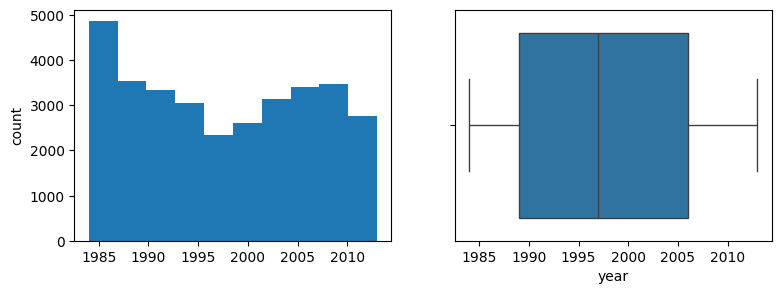

engine_cylinders
Skew : 0.79


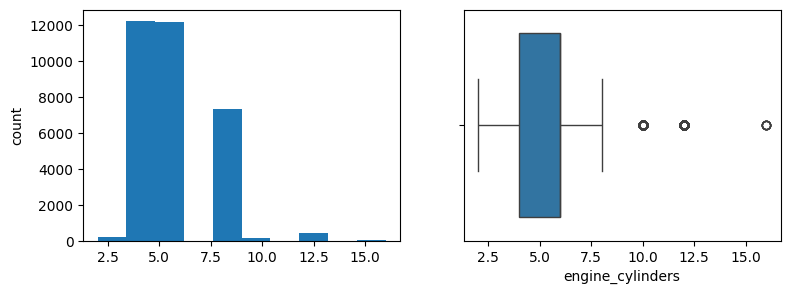

engine_displacement
Skew : 0.6


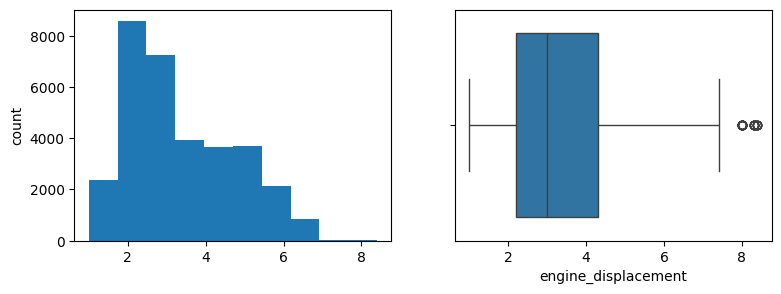

city_gasoline_consumption_cd
Skew : 180.27


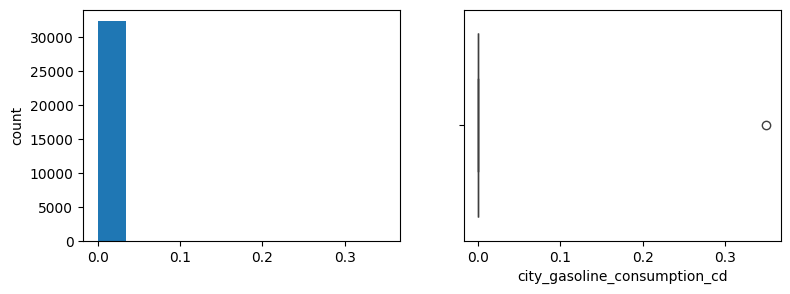

city_electricity_consumption
Skew : 33.32


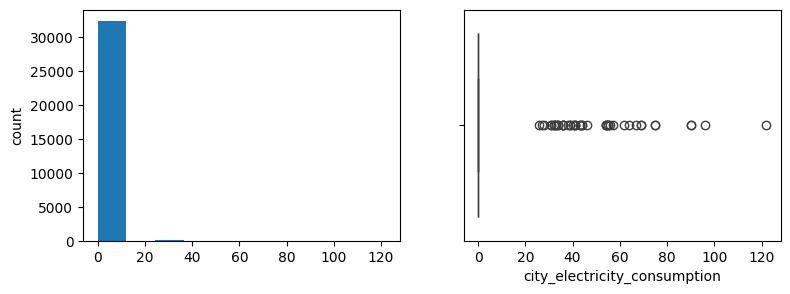

highway_gasoline_consumption_cd
Skew : 0


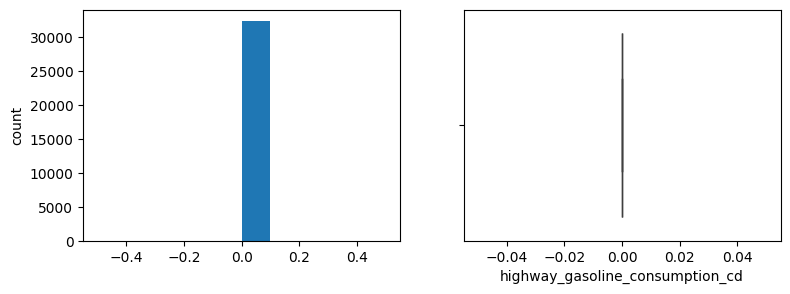

tailpipe_co2_in_grams_mile_ft1
Skew : 0.78


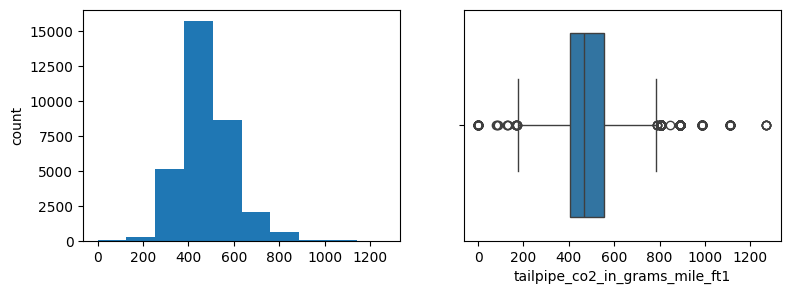

fuel_economy_score
Skew : 8.94


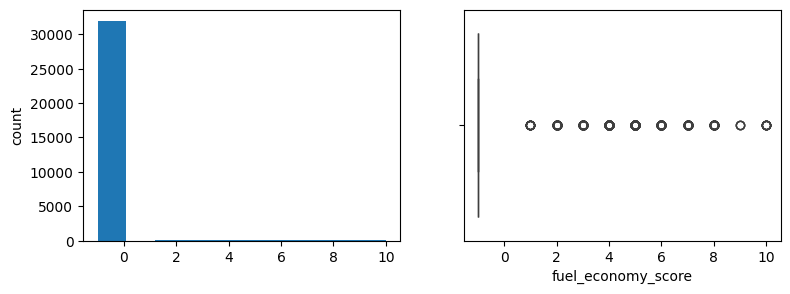

In [ ]:
for col in num:
  if col == 'year' or col == 'engine_cylinders' or col == 'engine_displacement' or col ==  'city_gasoline_consumption_cd' or col == 'city_electricity_consumption' or col == 'highway_gasoline_consumption_cd' or col == 'tailpipe_co2_in_grams_mile_ft1' or col == 'fuel_economy_score' :
    print(col)
    print('Skew :', round(data3[col].skew(), 2))
    plt.figure(figsize = (9, 3))
    plt.subplot(1, 2, 1)
    data3[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(data = data3, x=data3[col])
    plt.show()

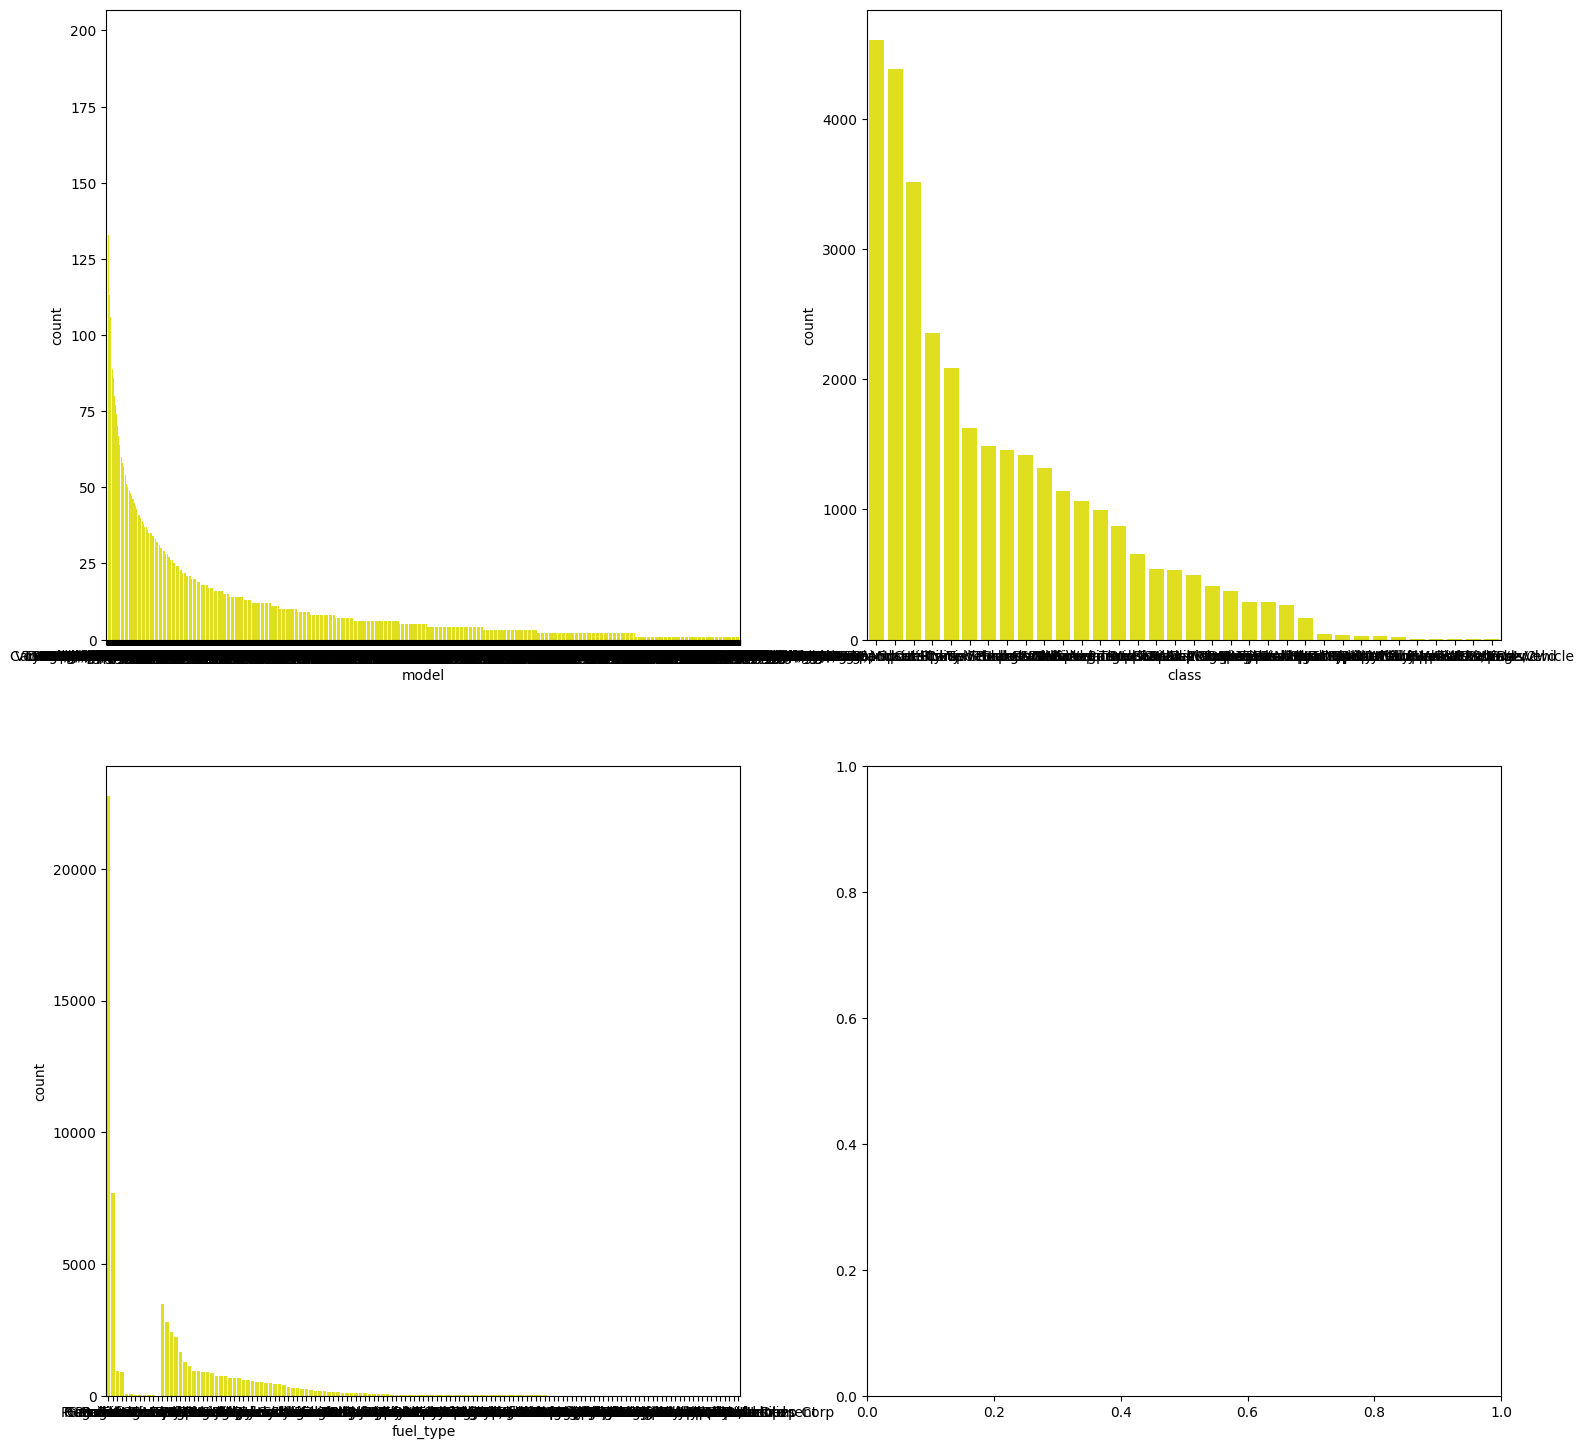

In [ ]:
fig, axes = plt.subplots(2, 2, figsize = (18, 18))
sns.countplot(ax = axes[0, 0], x = 'model', data = data3, color = 'yellow',
order = data3['model'].value_counts().index);
sns.countplot(ax = axes[0, 1], x = 'class', data = data3, color = 'yellow',
order = data3['class'].value_counts().index);
sns.countplot(ax = axes[1, 0], x = 'fuel_type', data = data3, color = 'yellow',
order = data3['fuel_type'].value_counts().index);
sns.countplot(ax = axes[1, 0], x = 'make', data = data3, color = 'yellow',
order = data3['make'].value_counts().index);